# Get and Format data 

In [1]:
from tqdm import tqdm
import gzip
import os
import shutil
import urllib.request
import requests
import json
import io
import pandas as pd
import numpy as np
import rampwf as rw
from rampwf.workflows.sklearn_pipeline import SKLearnPipeline, Estimator
from rampwf.prediction_types import make_regression
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

from problem import *

In [21]:
X_train, Y_train = get_train_data()
X_test, Y_test = get_test_data()

In [22]:
X_train.head()

,numero_dpe,usr_diagnostiqueur_id,usr_logiciel_id,tr001_modele_dpe_id,nom_methode_dpe,version_methode_dpe,nom_methode_etude_thermique,version_methode_etude_thermique,date_visite_diagnostiqueur,date_etablissement_dpe,...,tv017_zone_hiver_code,tv017_zone_hiver_t_ext_moyen,tv017_zone_hiver_peta_cw,tv017_zone_hiver_dh14,tv017_zone_hiver_prs1,tv018_zone_ete_code,tv018_zone_ete_sclim_inf_150,tv018_zone_ete_sclim_sup_150,tv018_zone_ete_rclim_autres_etages,tv018_zone_ete_rclim_dernier_etage
id,,,,,,,,,,,,,,,,,,,,,
9847012,2059V4000211I,11256,3,4,Méthode Facture,None,\N,\N,2020-07-16,2020-07-16,...,H1,6.58,10.5,42030,3.6,Ea,2,4,1.5,2
3100675,1642V8000063O,5950,3,8,Méthode Facture,None,\N,\N,2016-02-15,2016-02-24,...,H1,6.58,10.5,42030,3.6,Ec,4,6,3.0,4
7649230,1961V8000037T,18128,3,8,Méthode Facture,None,\N,\N,2019-03-14,2019-03-15,...,H1,6.58,10.5,42030,3.6,Ea,2,4,1.5,2
9675593,2049V3000020E,8018,10,3,FACTURE - DPE,V2012,\N,\N,2020-03-25,2020-03-25,...,H2,8.08,12.0,33300,3.4,Eb,3,5,2.0,3
7957705,1959V4000173X,12423,2,4,3CL - DPE,V2012,\N,\N,2019-04-17,2019-04-10,...,H1,6.58,10.5,42030,3.6,Ea,2,4,1.5,2


In [7]:
Y_train.head()

,classe_consommation_energie,classe_estimation_ges
id,,
9847012,C,D
3100675,E,B
7649230,G,D
9675593,C,B
7957705,E,E


In [5]:
X_train.shape

(197413, 126)

In [8]:
X_test.shape

(84606, 126)

In [6]:
Y_train.shape

(197413, 2)

In [9]:
Y_test.shape

(84606, 2)

In [10]:
df_train = pd.concat([X_train, Y_train], axis=1)
df_test = pd.concat([X_test, Y_test], axis=1)

df = pd.concat([df_train, df_test], axis=0)

In [11]:
df_train.shape

(197413, 128)

In [12]:
df.describe()

,usr_diagnostiqueur_id,usr_logiciel_id,tr001_modele_dpe_id,tr002_type_batiment_id,annee_construction,tv016_departement_id,etat_avancement,est_efface,longitude,latitude,...,tv016_departement_fecs_ancienne_i_c,tv016_departement_fecs_recente_i_c,tv017_zone_hiver_t_ext_moyen,tv017_zone_hiver_peta_cw,tv017_zone_hiver_dh14,tv017_zone_hiver_prs1,tv018_zone_ete_sclim_inf_150,tv018_zone_ete_sclim_sup_150,tv018_zone_ete_rclim_autres_etages,tv018_zone_ete_rclim_dernier_etage
count,282019.000000,282019.000000,282019.000000,282019.000000,282019.000000,282019.000000,282019.0,282019.0,219072.000000,219072.000000,...,282019.000000,282019.000000,282019.000000,282019.000000,282019.000000,282019.000000,282019.000000,282019.000000,282019.000000,282019.000000
mean,10242.676423,5.559133,8.272815,4.029909,1628.223471,54.114613,1.0,0.0,2.703148,47.160061,...,30.102057,43.323521,7.323090,11.337165,37506.687635,3.471519,3.369184,5.369184,2.456113,3.369184
std,5655.386934,3.946452,5.005003,0.170338,744.884863,26.394410,0.0,0.0,2.770933,2.093992,...,4.953456,8.866348,1.024704,1.251587,6426.050606,0.211172,0.913262,0.913262,0.794929,0.913262
min,3.000000,2.000000,1.000000,4.000000,-1.000000,1.000000,1.0,0.0,-61.525777,16.415924,...,24.000000,0.000000,6.580000,10.500000,22200.000000,2.900000,2.000000,4.000000,1.500000,2.000000
25%,5902.000000,3.000000,4.000000,4.000000,1947.000000,33.000000,1.0,0.0,1.095219,45.716518,...,26.000000,38.000000,6.580000,10.500000,33300.000000,3.400000,3.000000,5.000000,2.000000,3.000000
50%,10136.000000,3.000000,8.000000,4.000000,1948.000000,59.000000,1.0,0.0,2.415382,47.684452,...,29.000000,42.000000,6.580000,10.500000,42030.000000,3.600000,3.000000,5.000000,2.000000,3.000000
75%,14270.000000,10.000000,8.000000,4.000000,1982.000000,75.000000,1.0,0.0,4.868526,48.857486,...,32.000000,47.000000,8.080000,12.000000,42030.000000,3.600000,4.000000,6.000000,3.000000,4.000000
max,25879.000000,16.000000,24.000000,5.000000,20011.000000,97.000000,1.0,0.0,9.551810,51.080627,...,43.000000,62.000000,9.650000,14.500000,42030.000000,3.600000,5.000000,7.000000,4.000000,5.000000


In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isna())

# Plot interactive map

In [13]:
dpe = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs=4326
)
dpe = dpe.dropna(subset=["longitude", "latitude"])

In [14]:
palette = sns.color_palette("coolwarm", 8)


def interactive_map_dpe(dpe):
    # convert in number
    dpe["color"] = [
        ord(dpe.iloc[i]["classe_consommation_energie"].lower()) - 96
        for i in range(len(dpe))
    ]
    dpe = dpe.loc[dpe["color"] <= 7]
    dpe["color"] = [palette.as_hex()[x] for x in dpe["color"]]

    center = dpe[["latitude", "longitude"]].mean().values.tolist()
    sw = dpe[["latitude", "longitude"]].min().values.tolist()
    ne = dpe[["latitude", "longitude"]].max().values.tolist()

    m = folium.Map(location=center, tiles="Stamen Toner")

    # I can add marker one by one on the map
    for i in range(0, len(dpe)):
        folium.Marker(
            [dpe.iloc[i]["latitude"], dpe.iloc[i]["longitude"]],
            popup=f"Année de construction: {dpe.iloc[i]['annee_construction']}, <br>DPE: {dpe.iloc[i]['classe_consommation_energie']}",
            icon=folium.Icon(
                color="black", icon="home", icon_color=dpe.iloc[i]["color"]
            ),
        ).add_to(m)

    m.fit_bounds([sw, ne])

    return m


m = interactive_map_dpe(dpe.head(10))

/Users/guillaumephilippe/own-ramp-kit/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [15]:
m

# Look at labels

In [16]:
Y_train.head()

,classe_consommation_energie,classe_estimation_ges
id,,
9847012,C,D
3100675,E,B
7649230,G,D
9675593,C,B
7957705,E,E


In [17]:
Y_train.describe()

,classe_consommation_energie,classe_estimation_ges
count,197413,197413
unique,10,9
top,D,B
freq,47942,57971


In [18]:
Y = pd.concat([Y_train, Y_test], axis=0)
Y.shape

(282019, 2)

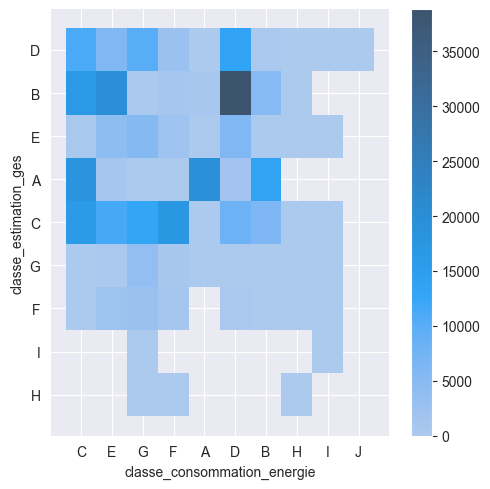

In [19]:
sns.displot(Y, x="classe_consommation_energie", y="classe_estimation_ges", row_order=["A", "B", "C", "D", "E", "F", "G", "H"], col_order=["A", "B", "C", "D", "E", "F", "G", "H"], cbar=True)
plt.show()

In [20]:
Y.value_counts()

classe_consommation_energie  classe_estimation_ges
D                            B                        38859
E                            B                        19883
A                            A                        19161
C                            A                        18110
F                            C                        17303
                                                      ...  
H                            G                            1
                             F                            1
A                            E                            1
F                            H                            1
J                            D                            1
Length: 65, dtype: int64